# IPL Score Prediction using Machine Learning


# Import Necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Load the dataset

In [3]:
#Importing dataset
ipl_df = pd.read_csv('/content/drive/MyDrive/practice/ipl_data.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (76014, 15)


In [4]:
print(ipl_df.columns)


Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')


In [5]:
# Fill missing values with 0
ipl_df.fillna(0, inplace=True)

# Calculate run rate
ipl_df['run_rate'] = ipl_df['runs'] / ipl_df['overs']
ipl_df['strick_rate'] = ipl_df['runs'] / ipl_df['runs_last_5']
ipl_df['economy'] = ipl_df['runs'] / ipl_df['total']
ipl_df['batting_avg'] = ipl_df['runs_last_5'] / ipl_df['wickets_last_5']
ipl_df['boundary_rate'] = ipl_df['runs'] / ipl_df['wickets_last_5']


# Calculate bowling average
# To avoid division by zero, we need to handle the case when wickets are 0
# In such cases, we'll assign bowling average as infinity, which can be replaced with 0
ipl_df['bowling_avg'] = ipl_df['runs'] / ipl_df['wickets'].replace(0, float('inf')).replace(float('inf'), 0)

# Display the DataFrame with the added columns
print(ipl_df)



       mid        date                                      venue  \
0        1  18/04/2008                      M Chinnaswamy Stadium   
1        1  18/04/2008                      M Chinnaswamy Stadium   
2        1  18/04/2008                      M Chinnaswamy Stadium   
3        1  18/04/2008                      M Chinnaswamy Stadium   
4        1  18/04/2008                      M Chinnaswamy Stadium   
...    ...         ...                                        ...   
76009  617  21/05/2017  Rajiv Gandhi International Stadium, Uppal   
76010  617  21/05/2017  Rajiv Gandhi International Stadium, Uppal   
76011  617  21/05/2017  Rajiv Gandhi International Stadium, Uppal   
76012  617  21/05/2017  Rajiv Gandhi International Stadium, Uppal   
76013  617  21/05/2017  Rajiv Gandhi International Stadium, Uppal   

                    bat_team                    bowl_team      batsman  \
0      Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1      Kolkata Knight R

# Exploratory Data Analysis

In [6]:
# First 5 Columns Data
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,wickets_last_5,striker,non-striker,total,run_rate,strick_rate,economy,batting_avg,boundary_rate,bowling_avg
0,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,...,0,0,0,222,10.000000,1.0,0.004505,inf,inf,inf
1,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,...,0,0,0,222,5.000000,1.0,0.004505,inf,inf,inf
2,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,...,0,0,0,222,10.000000,1.0,0.009009,inf,inf,inf
3,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,...,0,0,0,222,6.666667,1.0,0.009009,inf,inf,inf
4,1,18/04/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,...,0,0,0,222,5.000000,1.0,0.009009,inf,inf,inf


In [7]:
# Describing the ipl_dfset
ipl_df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_rate,strick_rate,economy,batting_avg,boundary_rate,bowling_avg
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,7.601400e+04,75206.000000,76014.000000,75288.0,75288.00,75288.0
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452,inf,2.130257,0.467102,inf,inf,inf
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231,NaN,1.055378,0.289237,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000e+00,1.000000,0.000000,0.0,0.00,0.0
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000,6.315789e+00,1.025641,0.220779,17.5,38.25,21.0
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000,7.500000e+00,2.000000,0.450583,36.0,80.00,34.5
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000,8.711340e+00,2.857143,0.706806,NaN,NaN,76.0
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000,inf,8.681818,1.000000,inf,inf,inf


In [8]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
 15  run_rate        76014 non-null  float64
 16  strick_rate     75206 non-null  float64
 17  economy         76014 non-null 

In [9]:
# Number of Unique Values in each column
ipl_df.nunique()

,0
mid,617
date,442
venue,35
bat_team,13
bowl_team,13
batsman,411
bowler,329
runs,252
wickets,11
overs,140


In [10]:
# ipl_df types of all Columns
ipl_df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


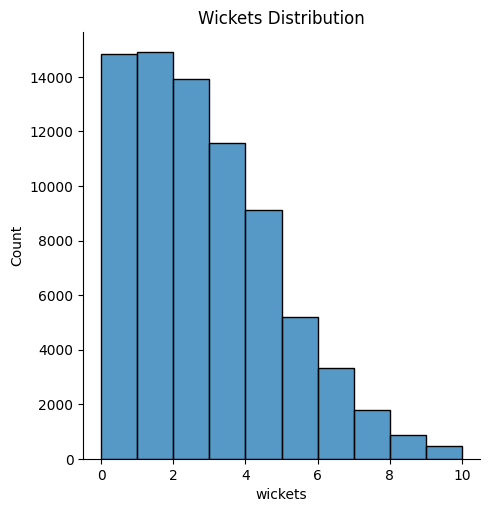

In [11]:
#Wickets Distribution
sns.displot(ipl_df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

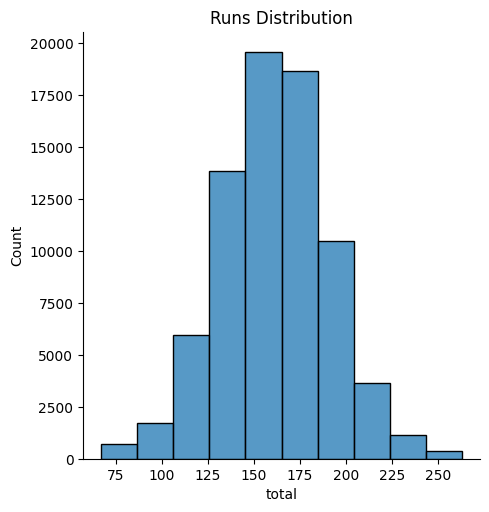

In [12]:
#Runs Distribution
sns.displot(ipl_df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

# Data Cleaning

#### Removing Irrelevant Data colunms

In [13]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total', 'run_rate', 'strick_rate', 'economy',
       'batting_avg', 'boundary_rate', 'bowling_avg'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [14]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker','run_rate','strick_rate','economy','batting_avg','boundary_rate','bowling_avg']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 21)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Keeping only Consistent Teams


In [15]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Royal Challengers Bangalore', 'Punjab Kings',
              'Delhi Capitals', 'Sunrisers Hyderabad','Gujrat Titans','Lucknow Super Giants']

In [16]:
# Filter the DataFrame based on consistent teams
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]

# Print the shape of DataFrame after filtering
print(f'After Removing Inconsistent Teams: {ipl_df.shape}')

# Print the unique consistent teams in the DataFrame
print(f"Consistent Teams:\n{ipl_df['bat_team'].unique()}")

# Display the first few rows of the DataFrame
ipl_df.head()


After Removing Inconsistent Teams: (60341, 8)
Consistent Teams:
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Punjab Kings' 'Royal Challengers Bangalore'
 'Delhi Capitals' 'Sunrisers Hyderabad' 'Lucknow Super Giants'
 'Gujrat Titans']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

In [17]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (60341, 8)
After Removing Overs : (44999, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Data Preprocessing and Encoding

#### Performing Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,8,61,0,5.1,59,0,222
33,3,8,61,1,5.2,59,1,222
34,3,8,61,1,5.3,59,1,222
35,3,8,61,1,5.4,59,1,222
36,3,8,61,1,5.5,58,1,222


#### Performing One Hot Encoding and Column Transformation

In [19]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0, 1])],
                                      remainder='passthrough')

In [20]:
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

Save the Numpy Array in a new DataFrame with transformed columns

In [21]:
import pandas as pd

# Assuming `ipl_df` is your original DataFrame containing IPL data

# Define the columns you want to include in the new DataFrame
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals', 'batting_team_Punjab Kings',
        'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
        'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
        'batting_team_Gujarat Titans',  # Add new team "Gujarat Titans"
        'batting_team_Lucknow Super Giants',  # Add new team "Lucknow Super Giants"
        'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Capitals', 'bowling_team_Punjab Kings',
        'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
        'bowling_team_Gujarat Titans', 'bowling_team_Sunrisers Hyderabad',
        'bowling_team_Royal Challengers Bangalore',  # Add new team "Gujarat Titans"
        'bowling_team_Lucknow Super Giants',  # Add new team "Lucknow Super Giants"
        'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']

# Create the new DataFrame with selected columns
df = pd.DataFrame(ipl_df, columns=cols)


In [22]:
# Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Punjab Kings,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,batting_team_Gujarat Titans,batting_team_Lucknow Super Giants,...,bowling_team_Gujarat Titans,bowling_team_Sunrisers Hyderabad,bowling_team_Royal Challengers Bangalore,bowling_team_Lucknow Super Giants,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

## Prepare Train and Test Data

In [23]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [24]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (35999, 25)
Testing Set : (9000, 25)


In [25]:
print(train_features.isnull().sum())
print(train_labels.isnull().sum())

batting_team_Chennai Super Kings            0
batting_team_Delhi Capitals                 0
batting_team_Punjab Kings                   0
batting_team_Kolkata Knight Riders          0
batting_team_Mumbai Indians                 0
batting_team_Rajasthan Royals               0
batting_team_Royal Challengers Bangalore    0
batting_team_Sunrisers Hyderabad            0
batting_team_Gujarat Titans                 0
batting_team_Lucknow Super Giants           0
bowling_team_Chennai Super Kings            0
bowling_team_Delhi Capitals                 0
bowling_team_Punjab Kings                   0
bowling_team_Kolkata Knight Riders          0
bowling_team_Mumbai Indians                 0
bowling_team_Rajasthan Royals               0
bowling_team_Gujarat Titans                 0
bowling_team_Sunrisers Hyderabad            0
bowling_team_Royal Challengers Bangalore    0
bowling_team_Lucknow Super Giants           0
runs                                        0
wickets                           

## ML  Algorithms

In [26]:
models = dict()

#### 1. Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [28]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.98%
Test Score : 84.66%


In [29]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 4.081722222222222
Mean Squared Error (MSE): 130.81880555555554
Root Mean Squared Error (RMSE): 11.437604887193627


#### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [31]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.48%
Test Score : 64.90%


In [32]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.910097833637106
Mean Squared Error (MSE): 299.4026713447911
Root Mean Squared Error (RMSE): 17.303256090828427


#### Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [34]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.09%
Test Score : 93.73%


In [35]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.3182887910052905
Mean Squared Error (MSE): 53.47723235148344
Root Mean Squared Error (RMSE): 7.312812889133937


KNR

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [37]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 86.72%
Test Score : 76.92%


In [38]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 9.736866666666666
Mean Squared Error (MSE): 196.86678666666668
Root Mean Squared Error (RMSE): 14.030922516594078


## Best Model

<BarContainer object of 4 artists>

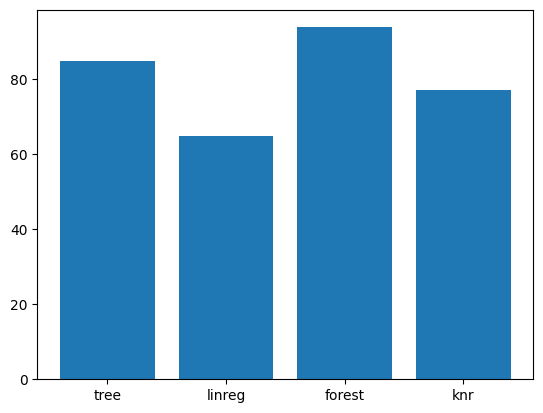

In [39]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **KNR**. So we will be choosing Random Forest for the final model

# Predictions

In [40]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif batting_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif batting_team == 'Gujrat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif batting_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif bowling_team == 'Gujrat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif bowling_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [41]:
batting_team='Delhi Capitals'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 145 || Actual Score : 147


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [42]:
batting_team='Mumbai Indians'
bowling_team='Punjab Kings'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 196')

Predicted Score : 197 || Actual Score : 196


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [43]:
batting_team="Punjab Kings"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 169 || Actual Score : 185


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [44]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 172 || Actual Score : 172


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [46]:
batting_team='Delhi Capitals'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 113 || Actual Score : 110


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 6
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [47]:
batting_team='Punjab Kings'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 149 || Actual Score : 153


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 7
- Batting Team : **Sunrisers Hyderabad**
- Bowling Team : **Royal Challengers Banglore**
- Final Score : **146/10**

In [48]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 129 || Actual Score : 146


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
batting_team='Gujrat Titans'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 143 || Actual Score : 146


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Export Model

In [50]:
from joblib import dump

filename = "IPL_model.joblib"

# Save the model using joblib
dump(forest, filename)


['IPL_model.joblib']